In [22]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%%markdown
# k-means

# k-means

In [6]:
samples = np.array([[1,2], [12,2], [0,1], [10,0], [9,1], \
                    [8,2], [0,10], [1,8], [2,9], [9,9], \
                    [10,8], [8,9] ], dtype = np.float)
centers = np.array([[3,2], [2,6], [9,3], [7,6]], dtype = np.float)
N = len(samples)


[]

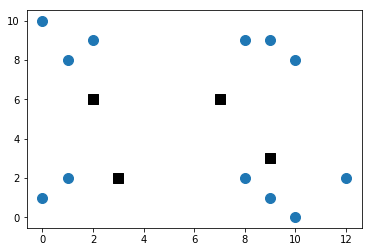

In [9]:
fig, ax = plt.subplots()
ax.scatter (samples.transpose()[0], samples.transpose()[1], marker = 'o', s = 100)
ax.scatter (centers.transpose()[0], centers.transpose()[1], marker = 's', s = 100, color='black')
plt.plot()

In [10]:
def distance (sample, centroids):
    distances = np.zeros(len(centroids))
    for i in range(0,len(centroids)):
        distances[i] = np.sqrt (sum (pow (np.subtract (sample, centroids[i]), 2)))
    return distances
    

In [20]:
def showcurrentstatus (samples, centers, clusters, plotnumber):
    plt.subplot (620 + plotnumber)
    plt.scatter (samples.transpose()[0], samples.transpose()[1], marker = 'o', s = 150, c = clusters)
    plt.scatter (centers.transpose()[0], centers.transpose()[1], marker = 's', s = 100, color = 'black')
    plt.plot()


In [21]:
def kmeans(centroids, samples, K, plotresults):
    N = len(samples)
    plt.figure (figsize=(20,20))
    
    distances = np.zeros ((N,K))
    new_centroids = np.zeros ((K, 2))
    final_centroids = np.zeros ((K, 2))
    clusters = np.zeros (N, np.int)
    
    for i in range (0, N):
        distances[i] = distance(samples[i], centroids)
        clusters[i] = np.argmin(distances[i])
        new_centroids[clusters[i]] += samples[i]
        divisor = np.bincount(clusters).astype(np.float)
        divisor.resize([K])
        for j in range(0, K):
            final_centroids[j] = np.nan_to_num(np.divide(new_centroids[j], divisor[j]))
            if (i > 3 and plotresults == True):
                showcurrentstatus(samples[:i], final_centroids, clusters[:i], i-3)
    return final_centroids
        

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/lib64/python3.4/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


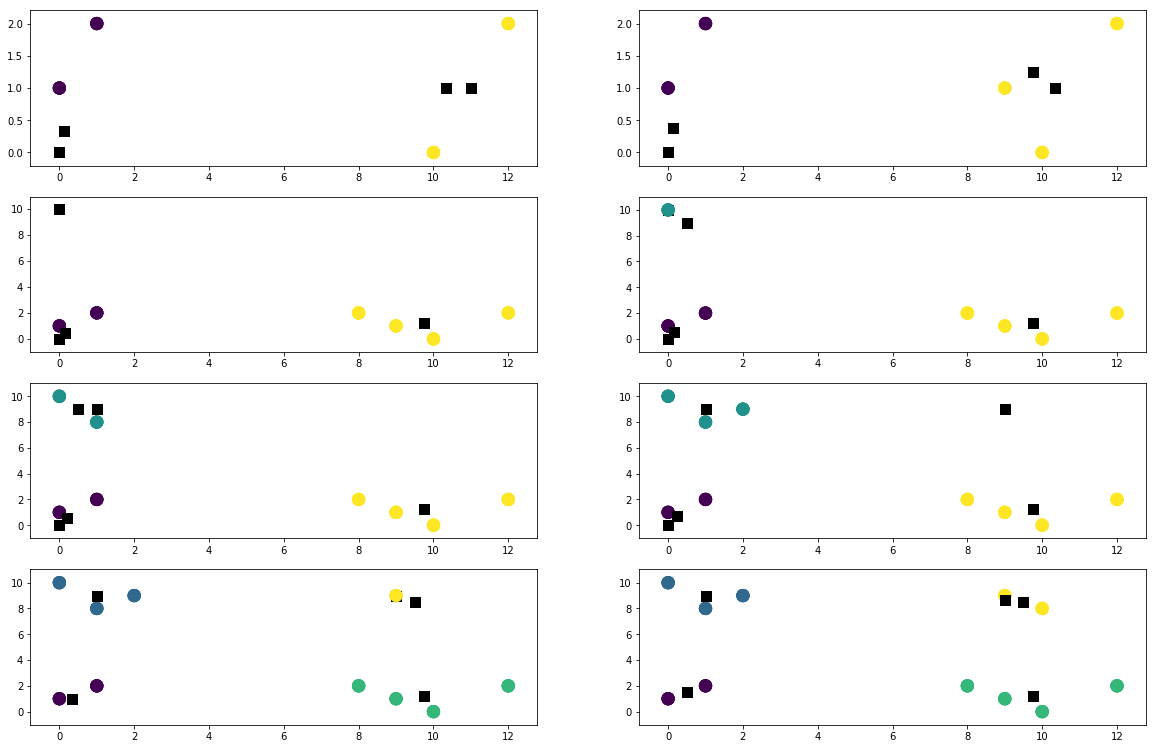

In [13]:
finalcenters = kmeans (centers, samples, 4, True)

In [24]:
%%markdown
# k-Nearest Neighbors (k-NN)

# k-Nearest Neighbors (k-NN)

[]

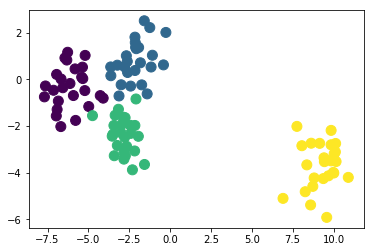

In [27]:
data, features = make_blobs (n_samples=100, n_features = 2, centers=4, shuffle=True, cluster_std=0.8)
fig, ax = plt.subplots()
ax.scatter(data.transpose()[0], data.transpose()[1], c=features,marker = 'o', s = 100)
plt.plot()

In [28]:
def distance_knn (sample, data):
    distances = np.zeros (len(data))
    for i in range (0,len(data)):
        dist = np.sqrt(sum(pow(np.subtract(sample, data[i]),2)))
        distances[i] = dist
    return distances


In [29]:
def add_sample (newsample, data, features):
    distances = np.zeros ((len(data),len(data[0])))
    # calculate the distance of the new sample and the current data
    distances = distance_knn (newsample, data)
    closestneighbors = np.argpartition (distances, 3)[:3]
    closestgroups = features [closestneighbors]
    return np.argmax (np.bincount (closestgroups))
        

In [30]:
def knn (newdata, data, features):
    for i in newdata:
        test = add_sample (i, data, features);
        features = np.append (features, [test], axis = 0)
        data = np.append (data, [i], axis = 0)
    return (data, features)
    

In [34]:
newsamples = np.random.rand(20, 2) * 20 - 8
#newsamples
finaldata, finalfeatures = knn (newsamples, data, features)

[]

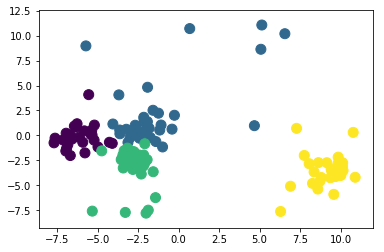

In [35]:
fig, ax = plt.subplots()
ax.scatter (finaldata.transpose()[0], finaldata.transpose()[1], c = finalfeatures,marker = 'o', s = 100)
ax.scatter (newsamples.transpose()[0], newsamples.transpose()[1], c = 'none', marker = 's', s = 100)
plt.plot()
    